<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/from_machine_learning_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)',setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 1.409112 sec
Naive NumPy: 1.116826 sec
Good NumPy: 0.017017 sec


In [1]:
import scipy, numpy
scipy.version.full_version
scipy.dot is numpy.dot

False

In [18]:
from io import StringIO
import numpy as np
import scipy as sp
# data = sp.genfromtxt("/content/web_traffic.tsv", delimiter = "\t")
data = np.genfromtxt("/content/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [19]:
x = data[:,0]
y = data[:,1]


In [20]:
sp.sum(sp.isnan(y))

<ipython-input-20-d6e39c765d76>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  sp.sum(sp.isnan(y))
<ipython-input-20-d6e39c765d76>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(sp.isnan(y))


8

In [43]:
>>> x = x[~sp.isnan(y)]
>>> y = y[~sp.isnan(y)]

<ipython-input-43-63f409da33d3>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  x = x[~sp.isnan(y)]
<ipython-input-43-63f409da33d3>:2: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  y = y[~sp.isnan(y)]


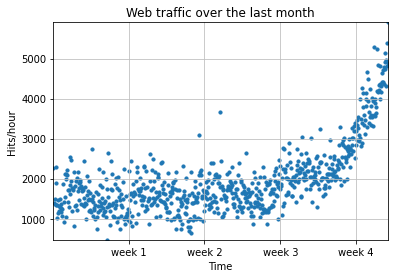

In [22]:
>>> import matplotlib.pyplot as plt
>>> # представляем точки (x,y) кружочками диаметра 10
>>> plt.scatter(x, y, s=10)
>>> plt.title("Web traffic over the last month")
>>> plt.xlabel("Time")
>>> plt.ylabel("Hits/hour")
>>> plt.xticks([w*7*24 for w in range(10)],
                 ['week %i' % w for w in range(10)])
>>> plt.autoscale(tight=True)
>>> # рисуем полупрозрачную сетку пунктирными линиями
>>> plt.grid(True, linestyle='-', color='0.75')
>>> plt.show()

In [16]:
def error(f, x, y):
     return sp.sum((f(x)-y)**2)

In [23]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

<ipython-input-23-176abcef6c22>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)


In [25]:
print("Параметры модели: %s" % fp1)
print(residuals)

Параметры модели: [  2.59619213 989.02487106]
[3.17389767e+08]


 f(x) = 2.59619213 * x + 989.02487106

In [39]:
>>> f1 = sp.poly1d(fp1)
>>> print(error(f1, x, y))

317389767.33977807


<ipython-input-16-4c7a863c8cc8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


<ipython-input-40-b9820c9f9c4a>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0,x[-1], 1000) # сгенерировать значения X для графика


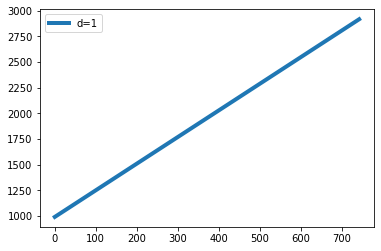

In [40]:
fx = sp.linspace(0,x[-1], 1000) # сгенерировать значения X для графика 
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

In [35]:
>>> f2p = sp.polyfit(x, y, 2)
>>> print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


<ipython-input-35-517e130e6db7>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f2p = sp.polyfit(x, y, 2)


In [36]:
>>> f2 = sp.poly1d(f2p)
>>> print(error(f2, x, y))

179983507.8781792


<ipython-input-16-4c7a863c8cc8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


<ipython-input-38-14082f52bd61>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0,x[-1], 1000) # сгенерировать значения X для графика


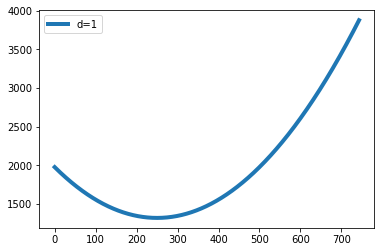

In [38]:
fx = sp.linspace(0,x[-1], 1000) # сгенерировать значения X для графика 
plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

In [48]:
from bisect import bisect_left

inflection = 3.5*7*24
index_xa = bisect_left(x,inflection,0,len(x)) #binary search to locate the index where inflection should be inserted.
xa  =  x[:index_xa]
ya  =  y[:index_xa]
xb  =  x[index_xa:]
yb  =  y[index_xa:]

In [49]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=135280910.179210


<ipython-input-49-6074f9abf4b1>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fa = sp.poly1d(sp.polyfit(xa, ya, 1))
<ipython-input-49-6074f9abf4b1>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fb = sp.poly1d(sp.polyfit(xb, yb, 1))
<ipython-input-16-4c7a863c8cc8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)
